In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import savReaderWriter

In [2]:
#load survey data

with savReaderWriter.SavReader('Dataset - 2017 Pew Research Center Science and News Survey (2017).sav') as reader:
    data = reader.all()

In [3]:
#load metadata, extract variable names, convert from bytes to utf-8

with savReaderWriter.SavHeaderReader('Dataset - 2017 Pew Research Center Science and News Survey (2017).sav') as header:
    metadata = header.all()
    variables = metadata.varNames

for i in range(len(variables)):
    variables[i] = variables[i].decode('utf-8')

In [4]:
#add variables to data and convert to dataframe, remove those who don't identify as Rep, Dem, or Independent (296)

pew_df = pd.DataFrame(data)
pew_df.columns = variables

party_df = pew_df.loc[(pew_df['PARTY'] != -1) & (pew_df['PARTY'] != 4)].copy(deep=True)
party_df.index = range((len(party_df)))
parties = ['Republican', 'Democrat', 'Independent']

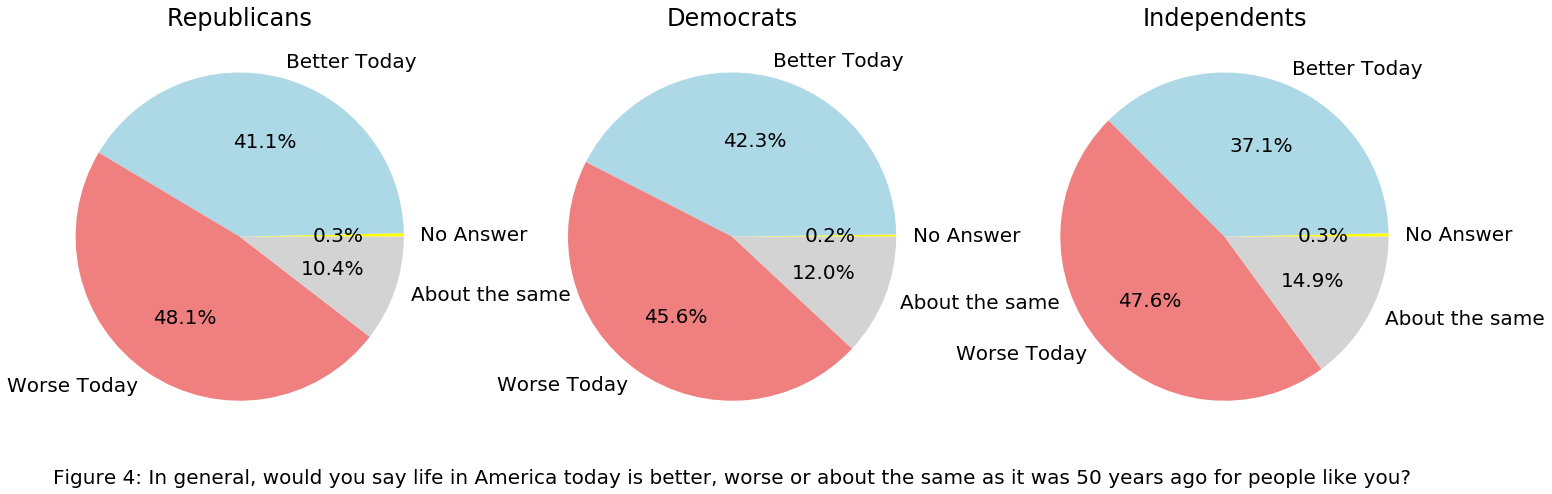

In [29]:
#Question- In general, would you say life in America today is better, worse or about the same as it was 50 years ago for people like you? 

# Answer- 1 = better today, 2 = worse today, 3 = same as 50 years ago
outlook = list(party_df.groupby(['PARTY', 'LIFE']).size())
outlook_byparty = []

#split into list of 3 parties
for i in range(3):
    outlook_byparty.append(outlook[i*4:i*4+4])

#Create pie chart variables
labels = ['No Answer', 'Better Today', 'Worse Today', 'About the same']
size_rep = outlook_byparty[0]
size_dem = outlook_byparty[1]
size_ind = outlook_byparty[2]
colors = ['yellow', 'lightblue', 'lightcoral', 'lightgrey']
txt= 'Figure 4: In general, would you say life in America today is better, worse or about the same as it was 50 years ago for people like you?'

#Create pie charts
plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 20})

plt.subplot(1,3,1)
plt.pie(size_rep,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Republicans")

plt.subplot(1,3,2)
plt.pie(size_dem,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Democrats")

plt.subplot(1,3,3)
plt.pie(size_ind,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Independents")

plt.text(-3, -1.5, txt, ha='center')
plt.show()

Analyze religious attendance scores. Note that the original data was coded so that a lower score indicated more frequent relgious attendance. I reversed the coding for a more intuitive interpretation.

In [16]:
# Frequency of attendance at religious services
# 1 = More than onceweek, 6 = Never

reversed_list = list(party_df.loc[:,'DOV_PPP20072'])

#Reverse code for more intuitive interpretation (i.e. higher score = more attendance
for i in range(len(reversed_list)):
    try:
        if party_df.loc[:,'DOV_PPP20072'][i] != -1:
            reversed_list[i] = 7 - party_df.loc[:,'DOV_PPP20072'][i]
        else:
            reversed_list[i] = -1
    except:
        print('Exception at: ' + i)
        
party_df['reversed_list'] = reversed_list    

#Remove 'No Answers' before taking means
party_df.loc[:,'reversed_list'].where(party_df.loc[:,'reversed_list'] > -1, None, inplace=True)
religious_attendance = party_df.groupby('PARTY')['reversed_list'].mean()

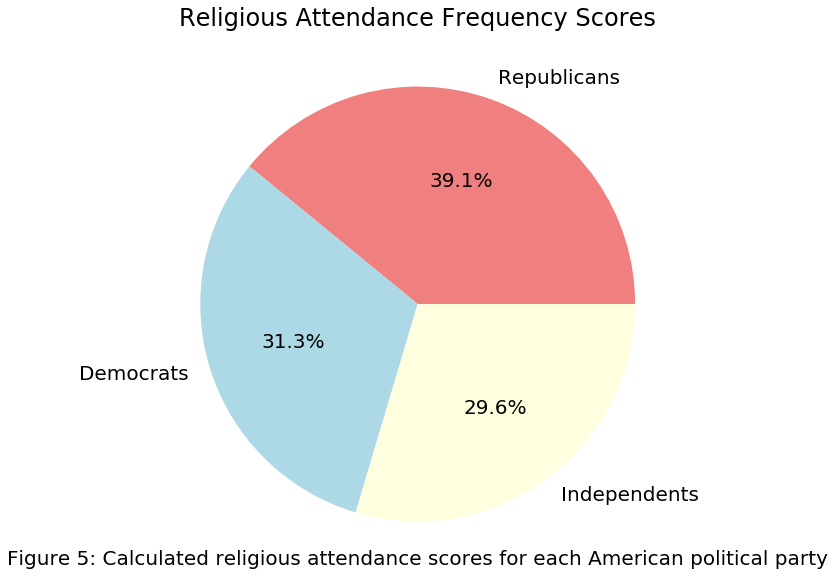

In [34]:
#Create pie chart for religious attendance
labels = ['Republicans', 'Democrats', 'Independents']
size = religious_attendance
colors = ['lightcoral', 'lightblue', 'lightyellow']
txt='Figure 5: Calculated religious attendance scores for each American political party'

#Create pie charts
plt.figure(figsize=(10,10))
plt.pie(size,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Religious Attendance Frequency Scores")

plt.text(0, -1.2, txt, ha='center')
plt.show()

Average religious attendance scores for each party

In [8]:
religious_attendance

PARTY
1.0    3.610199
2.0    2.892128
3.0    2.734336
Name: reversed_list, dtype: float64

Average religious attendance score for the dataset

In [9]:
party_df.loc[:,'reversed_list'].sum()/len(party_df.loc[:,'reversed_list'])

3.0627682403433476